### 최근접 이웃(K-Nearest Neighbor)

* 특별한 예측 모델 없이 가장 가까운 데이터 포인트를 기반으로 예측을 수행하는 방법
* 분류와 회귀 모두 지원

![k nearest neighbor](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png)

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing

In [44]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, load_breast_cancer, fetch_california_housing
from sklearn import datasets
# X, y = datasets.fetch_openml('boston', return_X_y=True)
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

### K 최근접 이웃 분류
- 입력 데이터 포인트와 가장 가까운 k개의 훈련 데이터 포인트가 출력
- k개의 데이터 포인트 중 가장 많은 클래스가 예측 결과

In [45]:
iris = load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['Target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [46]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
# train 데이터로 fit해주었기 때문에 test는 transform만 해주면 됨
X_test_scale = scaler.transform(X_test)

In [48]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
print(f'학습 데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가 데이터 점수 : {model.score(X_test, y_test)}')

학습 데이터 점수 : 0.9666666666666667
평가 데이터 점수 : 1.0


In [50]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [77]:
print(f'학습 데이터 점수 : {model.score(X_train_scale, y_train)}')
print(f'평가 데이터 점수 : {model.score(X_test_scale, y_test)}')
# 정규화한 데이터 결과가 항상 좋지는 않다

학습 데이터 점수 : 0.9802197802197802
평가 데이터 점수 : 0.9473684210526315


In [52]:
cross_validate(
    estimator=KNeighborsClassifier(),
    X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

# cross_validate() : 추정기(estimator)를 사용하여 교차 검증을 수행하는 함수
# estimator : 교차 검증을 수행할 모델을 정의
# X, y : 입력 변수, 타겟 변수 데이터를 지정
# cv : 교차 검증을 수행할 폴드 수 지정
# n_jobs : 교차 검증을 병렬로 실행할 작업 수를 지정
# multiprocessing.cpu_count() : 사용할 수 있는 cpu 코어의 개수를 반환
# verbose = True : 교차 검증 수행시 진행 상황을 출력하도록 설정

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    2.3s remaining:    3.4s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    2.3s finished


{'fit_time': array([0.00099874, 0.00100017, 0.00199795, 0.0010016 , 0.0010004 ]),
 'score_time': array([0.00299931, 0.00499988, 0.00499988, 0.00600076, 0.00500035]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [53]:
# 파라미터 그리드 정의
# GridSearchCV와 같은 하이퍼 파라미터 튜닝 도구에 사용되는 파라미터 그리드 정의 부분

param_grid = [{'n_neighbors' : [3,5,7],
               'weights' : ['uniform', 'distance'],
               'algorithm' : ['ball_tree', 'kd_tree', 'brute']}]
# n_neighbors : K 최근접 이웃 알고리즘에서 사용하는 하이퍼파라미터 >> 분류할 때 이웃의 수를 의미
# weights : KNN 알고리즘에서 이웃의 가중치를 설정하는 하이퍼파라미터
# >> 'uniform'(모든 이웃에게 동일한 가중치 부여) / 'distance'(이웃 간의 거리에 반비례하여 가중치 부여-거리가 가까울수록 큰 가중치 부여)
# algorithm : KNN 알고리즘에서 최근접 이웃을 검색하는데 사용할 알고리즘 설정 하이퍼파라미터
# >> 'ball_tree' : 고차원 데이터에 대해 빠른 검색 제공
# >> 'kd_tree' : 상대적으로 낮은 차원의 데이터에 효과적
# >> 'brute' : 모든 점과의 거리를 계산하는 알고리즘으로 데이터 양이 적을 때 효과적

In [54]:
gs = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [55]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=8,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [56]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)

In [57]:
print(f'GridSearchCV best score : {gs.best_score_}')

GridSearchCV best score : 0.9800000000000001


In [58]:
gs.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'uniform'}

In [59]:
def make_meshgrid(x, y, h=0.2):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [60]:
# t-SNE 알고리즘의 인스턴스를 생성
# t-SNE는 데이터 포인트 간의 유사성을 보존하면서 고차원 데이터를 저차원으로 변환하는 비선형 차원 축소 기법
# 단, 축약된 데이터가 어떤 기준으로 축약되었는지 해석하기 어렵다(PCA의 경우 더 해석이 용이한 차원 축소 기법)
# (n_components=2) : 고차원 데이터를 2차원 데이터로 변환하도록 설정
tsne = TSNE(n_components=2)

# t-SNE로 변환된 데이터로 다시 학습
X_comp = tsne.fit_transform(X)

In [61]:
iris_comp_df = pd.DataFrame(X_comp)
iris_comp_df['Target'] = y
iris_comp_df

,0,1,Target
0,-23.580931,-0.522060,0
1,-26.291704,-1.093696,0
2,-26.193335,0.053057,0
3,-26.638256,-0.321696,0
4,-23.545013,-0.941377,0
...,...,...,...
145,11.363099,-4.289077,2
146,10.691204,-1.015444,2
147,11.097084,-3.357184,2
148,13.195991,-3.724547,2


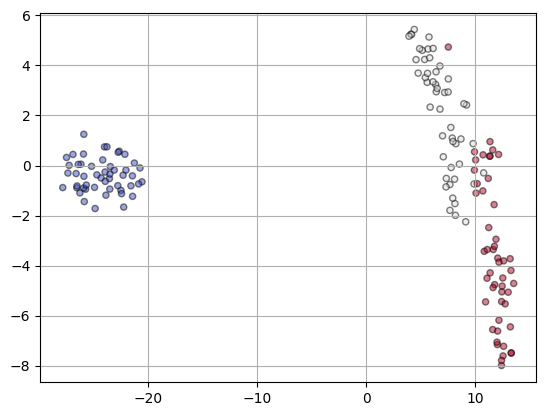

In [62]:
plt.scatter(X_comp[:, 0], X_comp[:, 1],
            c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k', alpha=0.5)
plt.grid()
plt.show()

In [63]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

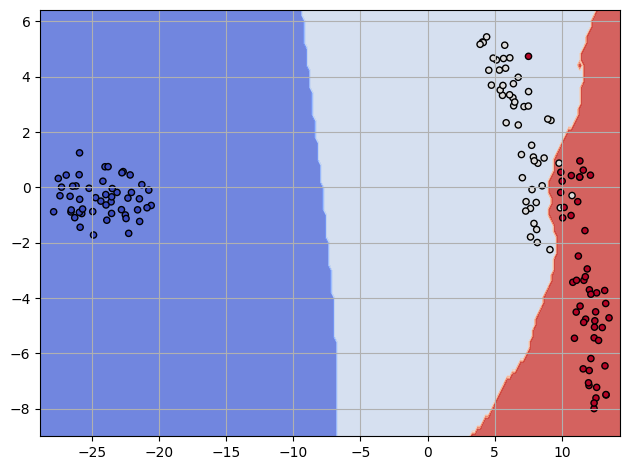

In [64]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

plt.tight_layout()
plt.grid()
plt.show()

### 유방암 데이터

In [65]:
cancer = load_breast_cancer()

cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df['Target'] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [66]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
cancer_train_df = pd.DataFrame(X_train, columns=cancer.feature_names)
cancer_train_df['Target'] = y_train
cancer_train_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750,1
1,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840,0
2,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490,1
3,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147,1
4,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840,1
451,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097,1
452,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120,1
453,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550,0


In [69]:
cancer_test_df = pd.DataFrame(X_test, columns=cancer.feature_names)
cancer_test_df['Target'] = y_test
cancer_test_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,12.47,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373,...,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750,1
1,18.94,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,0.05461,...,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589,0
2,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019,0
3,12.40,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,...,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359,1
4,11.54,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,0.06782,...,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,14.64,16.85,94.21,666.0,0.08641,0.06698,0.05192,0.02791,0.1409,0.05355,...,25.44,106.00,831.0,0.1142,0.2070,0.2437,0.07828,0.2455,0.06596,1
110,16.07,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,0.05391,...,24.56,128.80,1223.0,0.1500,0.2045,0.2829,0.15200,0.2650,0.06387,0
111,11.52,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.02929,0.1883,0.06168,...,21.19,80.88,491.8,0.1389,0.1582,0.1804,0.09608,0.2664,0.07809,1
112,14.22,27.85,92.55,623.9,0.08223,0.10390,0.11030,0.04408,0.1342,0.06129,...,40.54,102.50,764.0,0.1081,0.2426,0.3064,0.08219,0.1890,0.07796,1


In [71]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [72]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [73]:
print(f'학습 데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가 데이터 점수 : {model.score(X_test, y_test)}')

학습 데이터 점수 : 0.9406593406593406
평가 데이터 점수 : 0.956140350877193


In [74]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [76]:
print(f'학습 데이터 점수 : {model.score(X_train_scale, y_train)}')
print(f'평가 데이터 점수 : {model.score(X_test_scale, y_test)}')

학습 데이터 점수 : 0.9802197802197802
평가 데이터 점수 : 0.9473684210526315


In [78]:
estimator = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [79]:
cross_validate(
    estimator=estimator,
    X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    2.8s remaining:    4.3s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    2.9s finished


{'fit_time': array([0.00300169, 0.00500035, 0.00399899, 0.00300002, 0.00699711]),
 'score_time': array([0.10651875, 0.10151982, 0.09251809, 0.08551931, 0.09152341]),
 'test_score': array([0.96491228, 0.95614035, 0.98245614, 0.95614035, 0.96460177])}

In [80]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
     ('model', KNeighborsClassifier())]
)

In [91]:
param_grid = [{'model__n_neighbors' : [3,5,7],
               'model__weights' : ['uniform', 'distance'],
               'model__algorithm' : ['ball_tree', 'kd_tree', 'brute']}]

In [92]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [93]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=8,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [96]:
print(gs.best_estimator_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])


In [95]:
print(f'GridSearchCV best score : {gs.best_score_}')

GridSearchCV best score : 0.9701288619779538


In [97]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

In [101]:
cancer_comp_df = pd.DataFrame(X_comp)
cancer_comp_df['Target'] = y
cancer_comp_df

,0,1,Target
0,42.104282,-12.535738,0
1,42.269810,-9.850520,0
2,37.661800,-9.865570,0
3,-17.582714,1.816186,0
4,36.543030,-7.761000,0
...,...,...,...
564,43.790070,-9.225799,0
565,38.597885,-9.270696,0
566,22.164120,-2.738216,0
567,40.147724,-9.924445,0


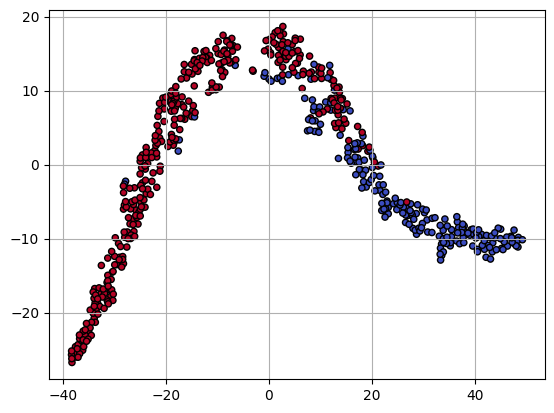

In [102]:
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

plt.grid()
plt.show()

In [104]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

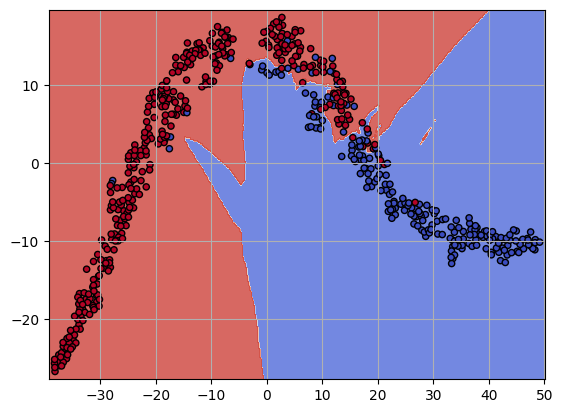

In [106]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

plt.grid()
plt.show()